Patrick Gray (patrick.c.gray at duke) - https://github.com/patrickcgray

Chapter 2: Your first remote sensing vegetation index
=====================================================

## Introduction
Now that we can read our data into the computer, let's calculate some vegetation indices.

The [Normalized Difference Vegetation Index (NDVI)](http://en.wikipedia.org/wiki/NDVI) is so ubiquitous that it even has a Wikipedia entry. If you're here for learning how to do remote sensing image processing this is a classic that you need to know. If you need a refresher, please visit the Wikipedia URL for [NDVI](http://en.wikipedia.org/wiki/NDVI).

This chapter will be very straightfoward. We've already seen how we can read our imagery into a NumPy array -- this chapter will simply extend these tools by showing how to do simple calculations on NumPy objects.

Let's bring up our previous code for opening our image and reading in the data:

In [1]:
import rasterio     # import the main rasterio function
from rasterio.plot import show, show_hist

import matplotlib   # matplotlib is the primary python plotting and viz library
import matplotlib.pyplot as plt

# this bit of magic allows matplotlib to plot inline ina  jupyter notebook
%matplotlib inline  
import folium       # folium is an interactive mapping library

# Import the NumPy module
import numpy as np

# Open a GDAL dataset
#dataset = rasterio.open('../../example/20181204_152426_0f4e/20181204_152426_0f4e_3B_AnalyticMS_SR.tif')
#dataset = rasterio.open('../../example/20180919_152031_1025/20180919_152031_1025_3B_AnalyticMS_SR.tif')
from rasterio.enums import ColorInterp
dataset = rasterio.open('../../example/rcr/20171006_rcr_masked.tif', 'r+')
dataset.shape

(4014, 6525)

In [2]:
clipped_img = dataset.read()[:, 500:1500:, 1500:3400] # we need to clip the image slightly because otherwise it blows out the memory
clipped_img.shape

(4, 1000, 1900)

### Let's take a look at the image:

Don't worry too much about this color_stretch function. Basically we have to stretch the image appropriately or it won't show up during plotting. Normally rasterio takes care of this but the correct metadata isn't included in Planet imagery.

In [3]:
def color_stretch(image, index):
    colors = image[index, :, :].astype(np.float64) # select the bands as indicated by the index argument
    for b in range(colors.shape[0]):
        colors[b, :, :] = rasterio.plot.adjust_band(colors[b, :, :]) # use the rasterio adjust band function for normalization
    return colors

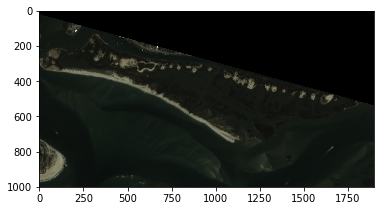

In [4]:
img321 = color_stretch(clipped_img, [2, 1, 0]) # apply the color stretch and select bands 
show(img321)

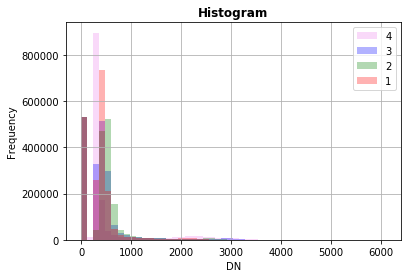

In [5]:
rasterio.plot.show_hist(clipped_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

Even from simple visualizations we can see the contrast between the red and the near-infared (NIR) bands.

## NDVI

To calculate NDVI, we can simply use standard arithmetic operators in Python because these operations in NumPy are vectorized. Just like MATLAB, R, and other higher level languages, **NEVER** loop over a NumPy array unless you can't avoid it.

In [18]:
np.seterr(divide='ignore', invalid='ignore') # just ignoring this error because the image has lots of NaN pixels

bandNIR = clipped_img[3] # fourth band
bandRed = clipped_img[2] # second band

# note that in python division of integers leads to integers so we need to specify floats in order to get floats
ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR+bandRed)

# we have to run this because much of the image is NaN due to it not being an exact rectangle / projected 
# basically it turns nans into 0s
ndvi = np.nan_to_num(ndvi)

Let's check out some stats on our NDVI

In [19]:
print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))


Max NDVI: 0.7603686635944701
Mean NDVI: -0.053854028101056224
Median NDVI: -0.03696941008618779
Min NDVI: -0.7936857562408223


Since this is simply a 2D array, with an NDVI value for each pixel, we can plot it like an image.

Note that the vegetation has high NDVI values and the sand and water has low NDVI.

We're plotting here with `matplotlib` instead of the `rasterio` specific plotting functions because this is just a normal matrix. We'll show a lot more plotting in the next chapter.

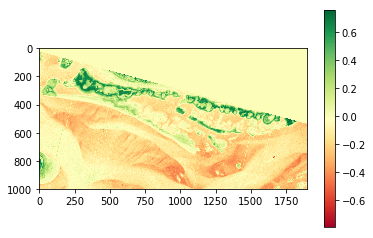

In [17]:
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()

#### This looks correct.

Speaking of *looking correct*, the next chapter will demonstrate how you can visualize your results using actual plots!